In [1]:
import numpy as np
import pandas as pd

In [2]:
#Importing Dataset
data=pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Import Pythhon Modules
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

plt.style.use("ggplot")
plt.rcParams["figure.figsize"]=[6,3]
plt.rcParams["figure.dpi"]=80

In [4]:
#Missing Values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

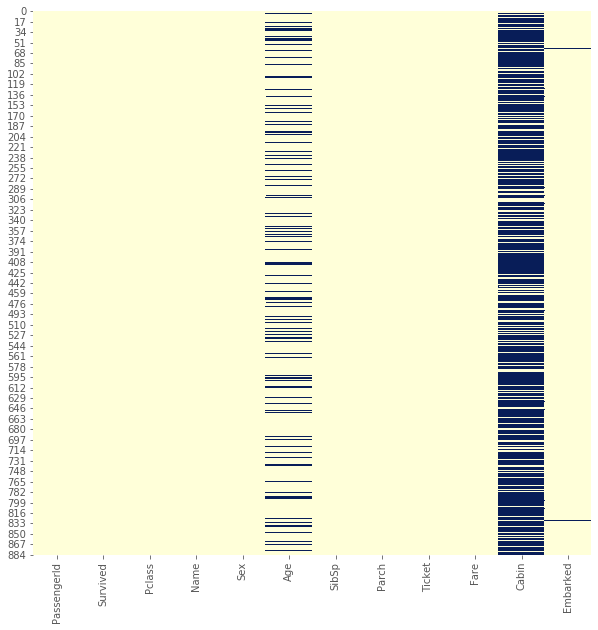

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull(),cbar=False,cmap="YlGnBu")
plt.ioff()

In [6]:
#Filling Age Missing Values
data["Title"]=0
for i in data:
    data["Title"]=data.Name.str.extract('([A-Za-z]+)\.')

In [7]:
pd.crosstab(data.Title,data.Sex).T.style.background_gradient(cmap="summer_r")

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [8]:
data["Title"].replace(["Mlle","Mme","Ms","Dr","Major","Lady","Countess","Jonkheer","Col","Rev","Capt","Sir","Don"],["Miss","Miss","Miss","Mr","Mr","Mrs","Mrs","Other","Other","Other","Mr","Mr","Mr"],inplace=True)

In [9]:
pd.crosstab(data.Title,data.Sex).T.style.background_gradient(cmap="summer_r")

Title,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,1,127,0
male,40,0,528,0,9


In [10]:
data.groupby("Title")["Age"].mean()

Title
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [11]:
#Filling NaN Ages
data.loc[(data.Age.isnull())&(data.Title=="Master"),"Age"]=5
data.loc[(data.Age.isnull())&(data.Title=="Miss"),"Age"]=22
data.loc[(data.Age.isnull())&(data.Title=="Mr"),"Age"]=33
data.loc[(data.Age.isnull())&(data.Title=="Mrs"),"Age"]=36
data.loc[(data.Age.isnull())&(data.Title=="Other"),"Age"]=46

In [12]:
data.Age.isnull().any() 

False

In [13]:
#Filling Embarked NaN
data["Embarked"].fillna("S",inplace=True)

In [14]:
data.Embarked.isnull().any()

False

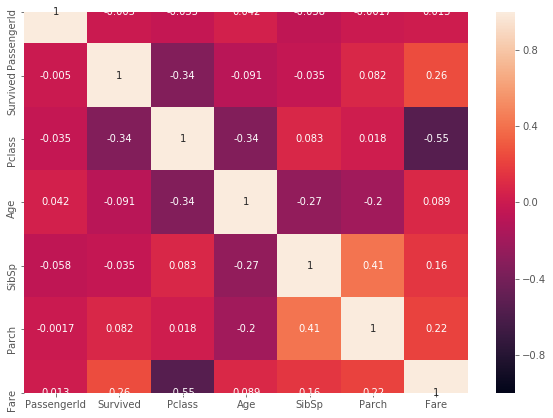

In [15]:
#Heat Map
corrmat=data.corr()
fig=plt.figure(figsize=(10,7))
sns.heatmap(corrmat,vmax=1,square=True,annot=True,vmin=-1)
plt.show()

In [16]:
#Unvariate Analysis
cols=data.columns
print(list(cols))

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title']


AttributeError: module 'matplotlib.pyplot' has no attribute 'tight_layoout'

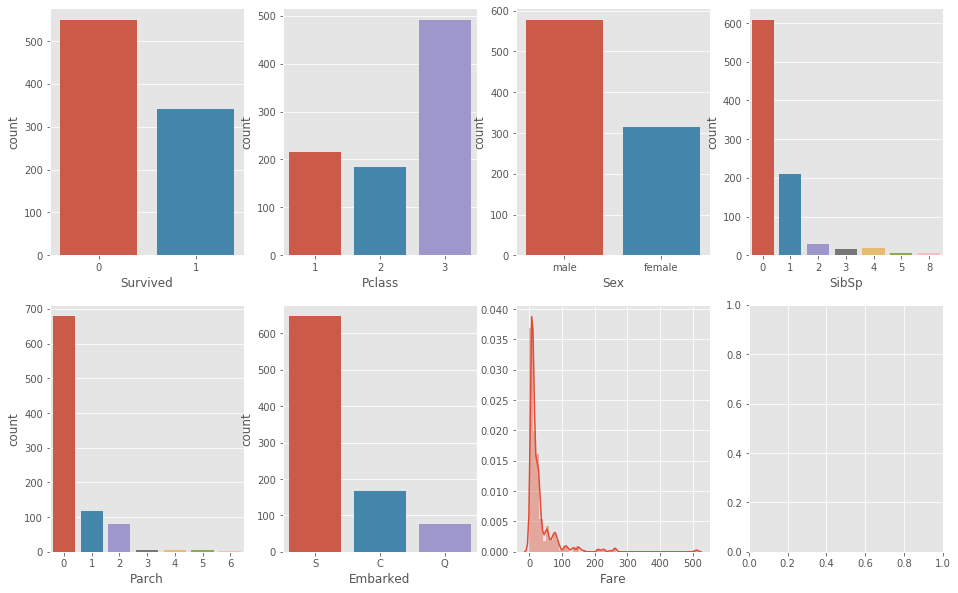

In [17]:
fig,ax=plt.subplots(2,4,figsize=(16,10))
sns.countplot("Survived",data=data,ax=ax[0][0])
sns.countplot("Pclass",data=data,ax=ax[0][1])
sns.countplot("Sex",data=data,ax=ax[0][2])
sns.countplot("SibSp",data=data,ax=ax[0][3])
sns.countplot("Parch",data=data,ax=ax[1][0])
sns.countplot("Embarked",data=data,ax=ax[1][1])
sns.distplot(data["Fare"],kde=True,ax=ax[1][2])

plt.tight_layoout()

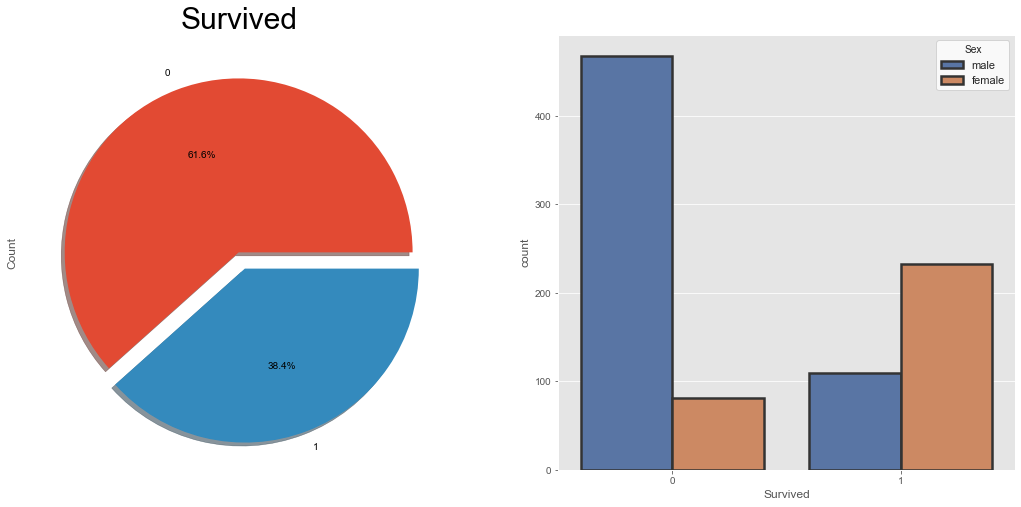

In [18]:
#Survived
f,ax=plt.subplots(1,2,figsize=(18,8))
data["Survived"].value_counts().plot.pie(ax=ax[0],explode=[0,0.1],shadow=True,autopct='%1.1f%%')
ax[0].set_title("Survived",fontsize=30)
ax[0].set_ylabel("Count")
sns.set(font="Verdana")
sns.set_style("ticks")
sns.countplot("Survived",hue="Sex",linewidth=2.5,edgecolor=".2",data=data,ax=ax[1])
plt.ioff()

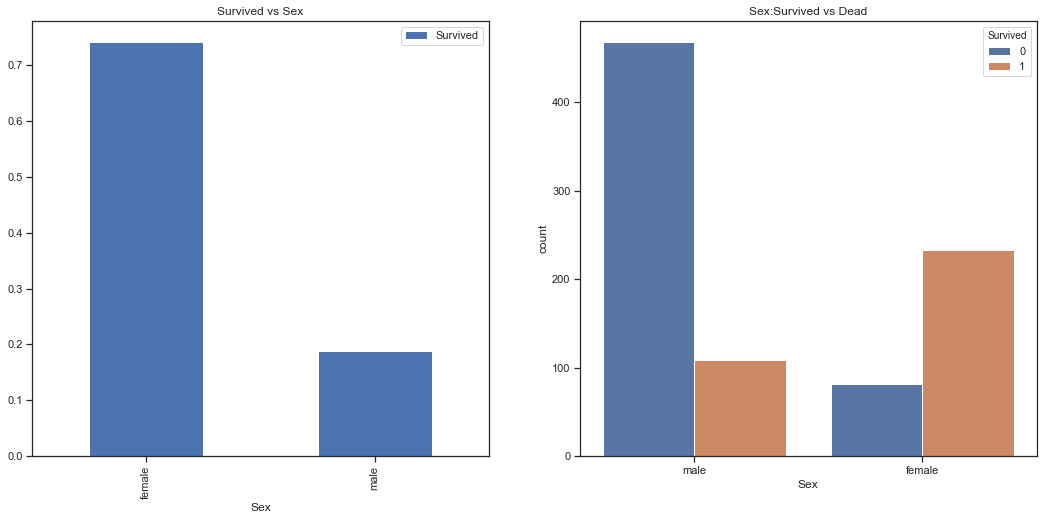

In [19]:
#Groupby and Countplot
f,ax=plt.subplots(1,2,figsize=(18,8))
data[["Sex","Survived"]].groupby(["Sex"]).mean().plot.bar(ax=ax[0])
ax[0].set_title("Survived vs Sex")
sns.countplot("Sex",hue="Survived",data=data,ax=ax[1])
ax[1].set_title("Sex:Survived vs Dead")
plt.show()

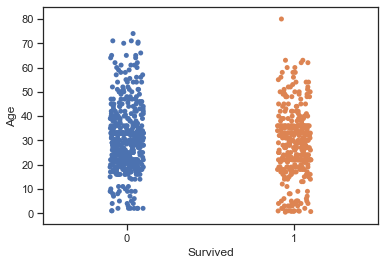

In [20]:
#Strip + Survived + Age Plot
sns.stripplot(x="Survived",y="Age",data=data, jitter=True)
pass

In [21]:
#Pclass
#Value Counts
data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [22]:
#Group By + Count
data.groupby(["Pclass","Survived"])["Survived"].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

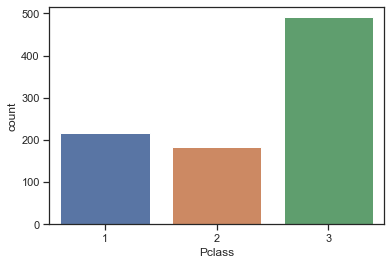

In [23]:
#Count Plot
sns.countplot("Pclass",data=data)
pass

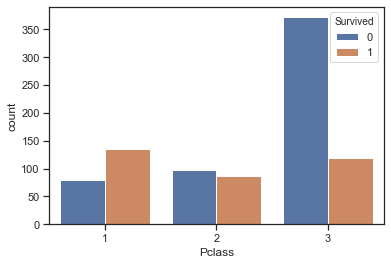

In [24]:
#Countplot with Hue
sns.countplot("Pclass",data=data,hue="Survived")
pass

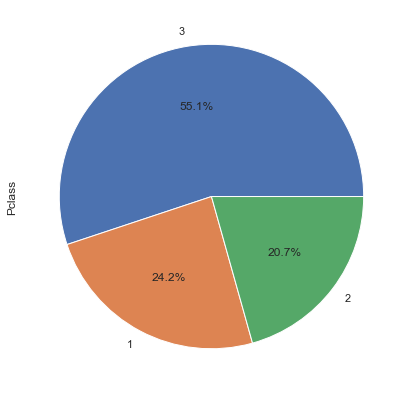

In [25]:
#Pie Plot + Value Counts
data["Pclass"].value_counts().plot.pie(autopct="%1.1f%%",figsize=(10,7))
pass

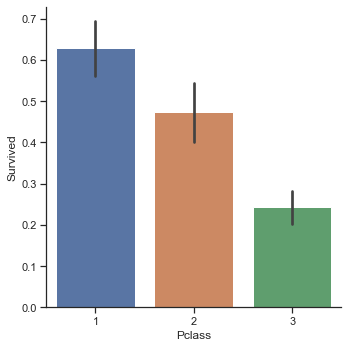

In [26]:
#Catplot
sns.catplot(x="Pclass",y="Survived",kind="bar",data=data)
pass

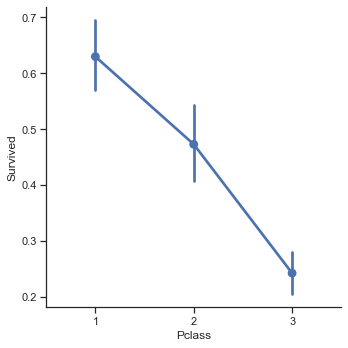

In [27]:
#Pointplot
sns.catplot(x="Pclass",y="Survived",kind="point",data=data)
pass

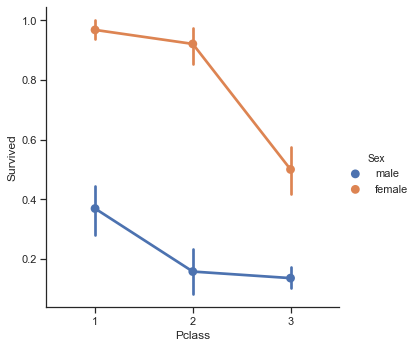

In [28]:
#Cat + Point + Hue Plot
sns.catplot(x="Pclass",y="Survived",kind="point",data=data,hue="Sex")
pass

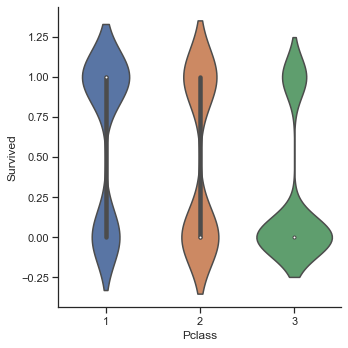

In [29]:
#Violin Plot
sns.catplot(x="Pclass",y="Survived",kind="violin",data=data)
pass

In [30]:
#Sex
#Value Counts
data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

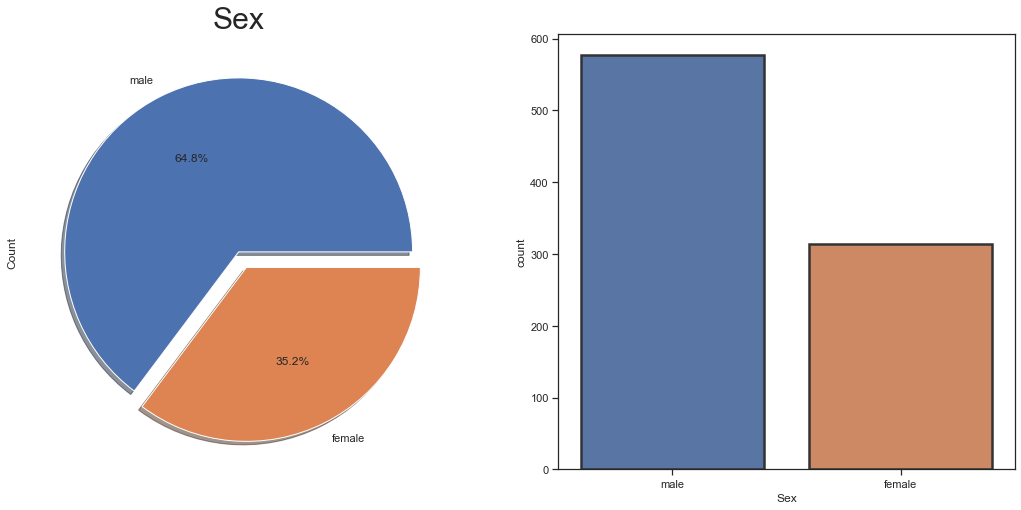

In [31]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data["Sex"].value_counts().plot.pie(ax=ax[0],explode=[0,0.1],shadow=True,autopct='%1.1f%%')
ax[0].set_title("Sex",fontsize=30)
ax[0].set_ylabel("Count")
sns.set(font="Verdana")
sns.set_style("ticks")
sns.countplot("Sex",linewidth=2.5,edgecolor=".2",data=data,ax=ax[1])
plt.ioff()

In [32]:
#Groupby + Count Plot
data.groupby(["Sex","Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

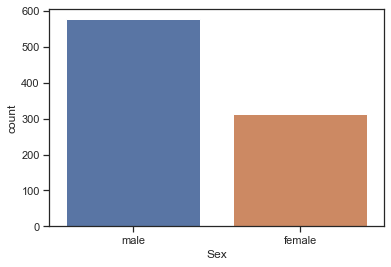

In [33]:
sns.countplot("Sex",data=data)
pass

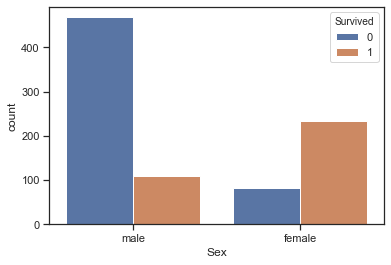

In [34]:
#Countplot + Hue
sns.countplot("Sex",data=data,hue="Survived")
pass

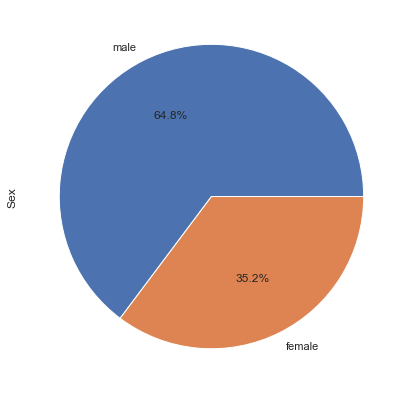

In [35]:
#Pie Plot + Value Counts
data["Sex"].value_counts().plot.pie(autopct="%1.1f%%",figsize=(10,7))
pass

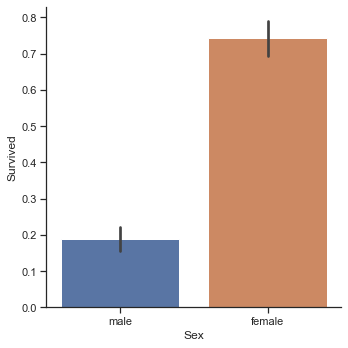

In [36]:
#Cat + Sex + Survived + Bar
sns.catplot(x="Sex",y="Survived",kind="bar",data=data)
pass

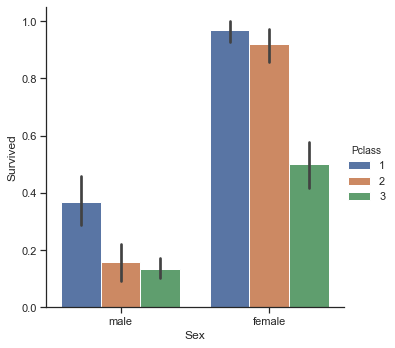

In [37]:
#Catplot + Sex +Survived +Bar + Pclass Hue Plot
sns.catplot(x="Sex",y="Survived",kind="bar",data=data,hue="Pclass")
pass

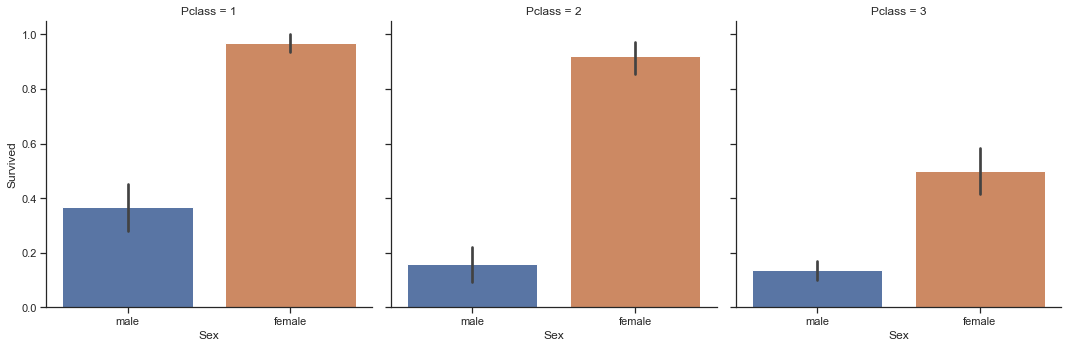

In [38]:
#Catplot + Sex +Survived +Bar + Pclass Column Plot
sns.catplot(x="Sex",y="Survived",kind="bar",data=data,col="Pclass")
pass

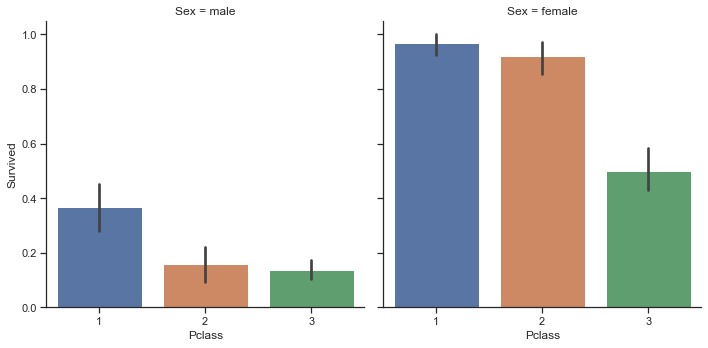

In [39]:
#Catplot + Sex +Survived +Bar + Sex Column Plot
sns.catplot(x="Pclass",y="Survived",kind="bar",data=data,col="Sex")
pass

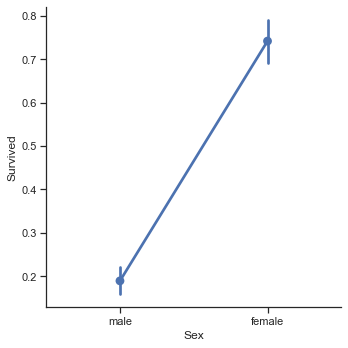

In [40]:
#Cat + Sex + Survived + Point Plot
sns.catplot(x="Sex",y="Survived",kind="point",data=data)
pass

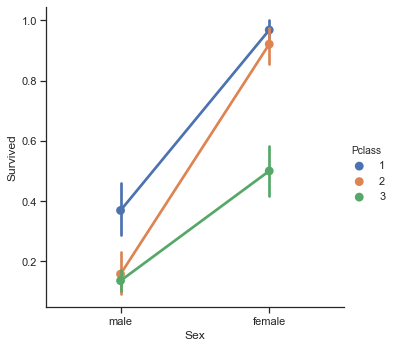

In [41]:
#Cat + Sex + Survived + Point + Pclass Hue Plot
sns.catplot(x="Sex",y="Survived",kind="point",data=data,hue="Pclass")
pass

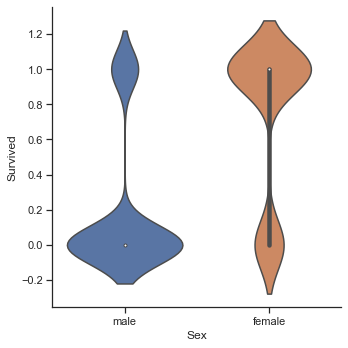

In [42]:
#Cat + Sex + Survived + Violin Plot
sns.catplot(x="Sex",y="Survived",kind="violin",data=data)
pass

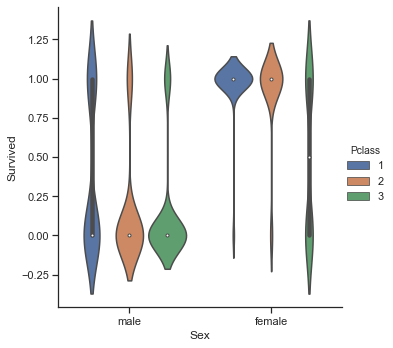

In [43]:
#Cat + Sex + Survived + Violin + Pclass Hue Plot
sns.catplot(x="Sex",y="Survived",kind="violin",data=data,hue="Pclass")
pass

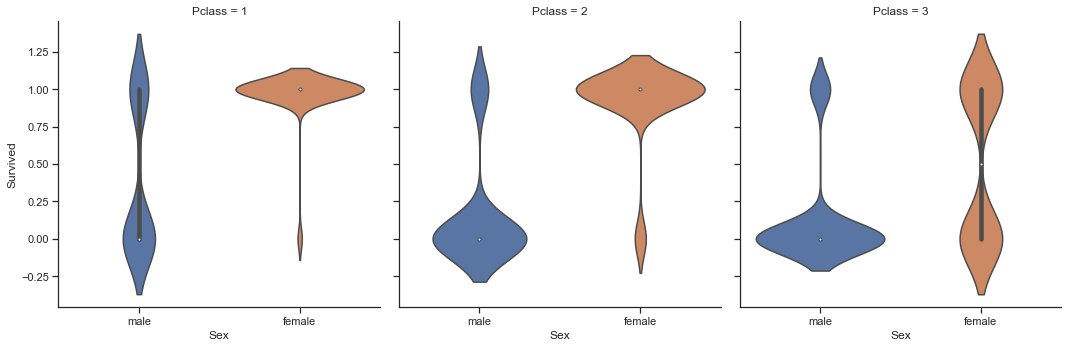

In [44]:
#Cat + Sex + Survived + Violin + Pclass Column Plot
sns.catplot(x="Sex",y="Survived",kind="violin",data=data,col="Pclass")
pass

In [45]:
#Fare
print("Highest Fare was:",data["Fare"].max())
print("Lowest Fare was:",data["Fare"].min())
print("Average Fare was:",data["Fare"].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


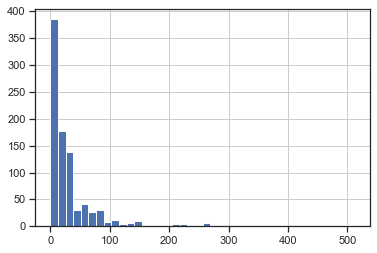

In [46]:
#Histogram
data["Fare"].hist(bins=40)
pass

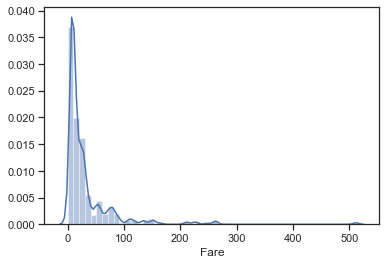

In [47]:
#Distribution plot
sns.distplot(data["Fare"])
plt.xlabel("Fare")
plt.show()
pass

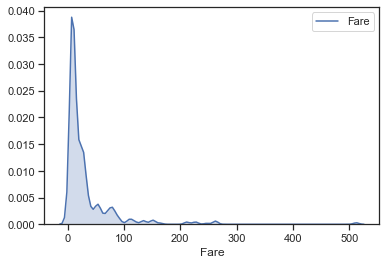

In [48]:
#KDE Plot
sns.kdeplot(data["Fare"],shade=True)
plt.xlabel("Fare")
plt.show()
pass

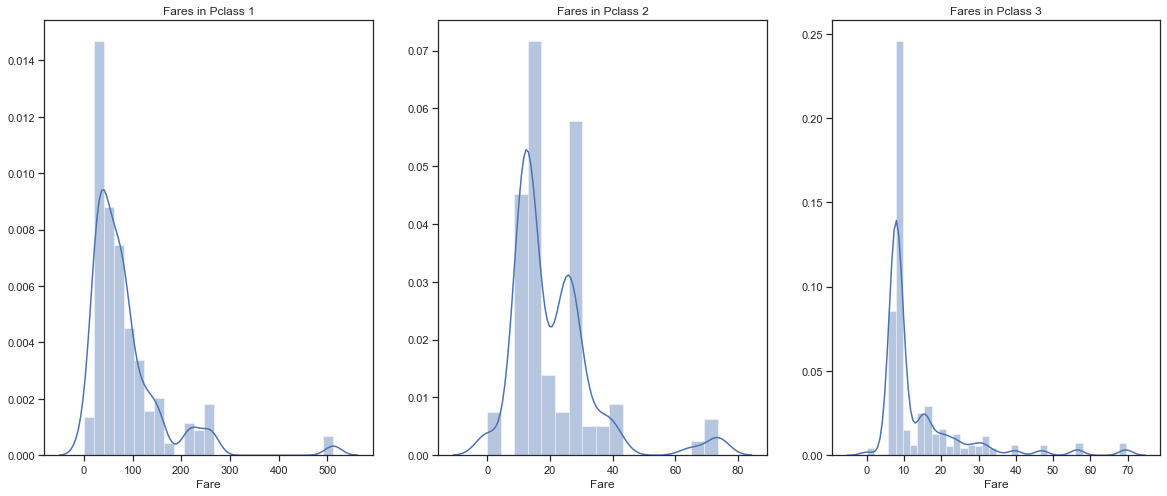

In [49]:
#Classwise Fare Distribution
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data["Pclass"]==1].Fare,ax=ax[0])
ax[0].set_title("Fares in Pclass 1")
sns.distplot(data[data["Pclass"]==2].Fare,ax=ax[1])
ax[1].set_title("Fares in Pclass 2")
sns.distplot(data[data["Pclass"]==3].Fare,ax=ax[2])
ax[2].set_title("Fares in Pclass 3")
plt.show()

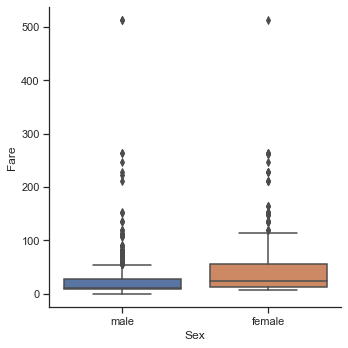

In [50]:
#Cat + Sex + Fare + Box Plot
sns.catplot(x="Sex",y="Fare",data=data,kind="box")
pass

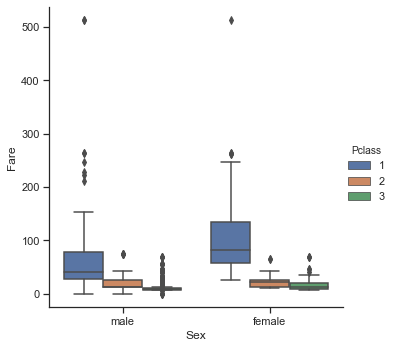

In [51]:
#Cat + Sex + Fare + Boxplot + Pclass Hue Plot
sns.catplot(x="Sex",y="Fare",data=data,kind="box",hue="Pclass")
pass

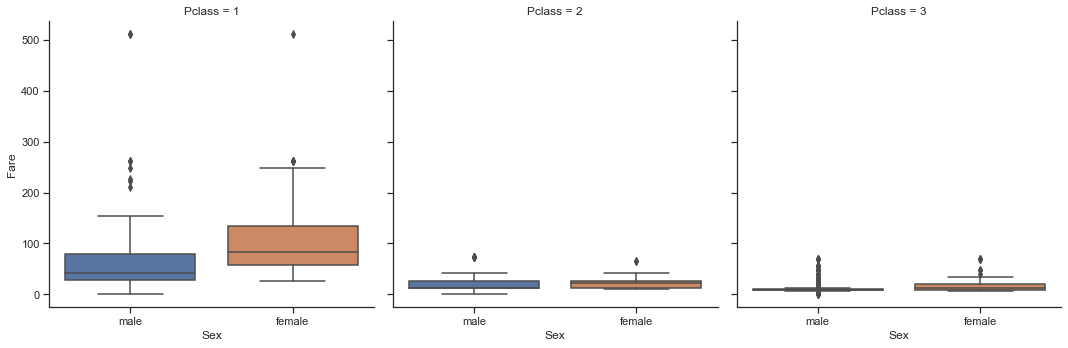

In [52]:
#Cat + Sex + Fare + Box + Pclass Column Plot
sns.catplot(x="Sex",y="Fare",data=data,kind="box",col="Pclass")
pass

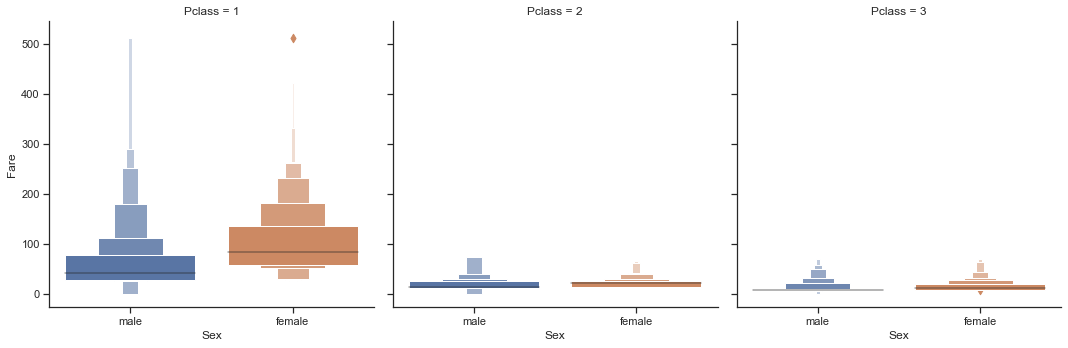

In [53]:
#Cat + Sex + Fare + Boxen + Pclass Column Plot
sns.catplot(x="Sex",y="Fare",data=data,kind="boxen",col="Pclass")
pass

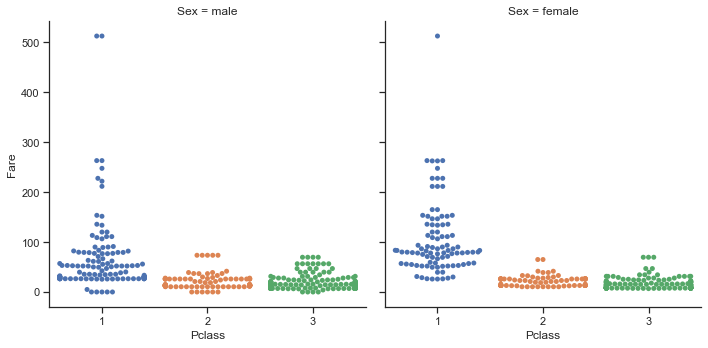

In [54]:
#Cat + Pclass + Fare + Swarm + Sex Column Plot
sns.catplot(x="Pclass",y="Fare",data=data,kind="swarm",col="Sex")
pass

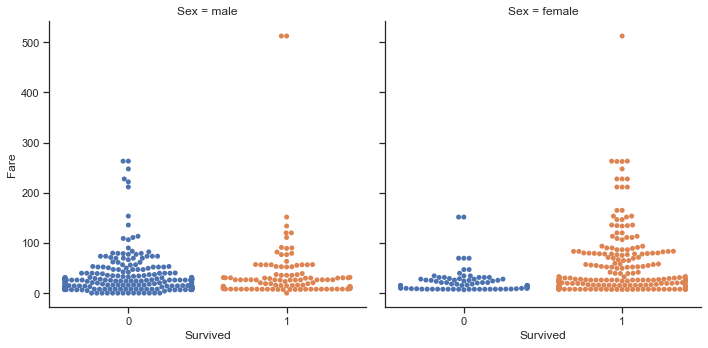

In [55]:
#Catplot + Survived + Fare + Swarm + Sex Column
sns.catplot(x="Survived",y="Fare",data=data,kind="swarm",col="Sex")
pass

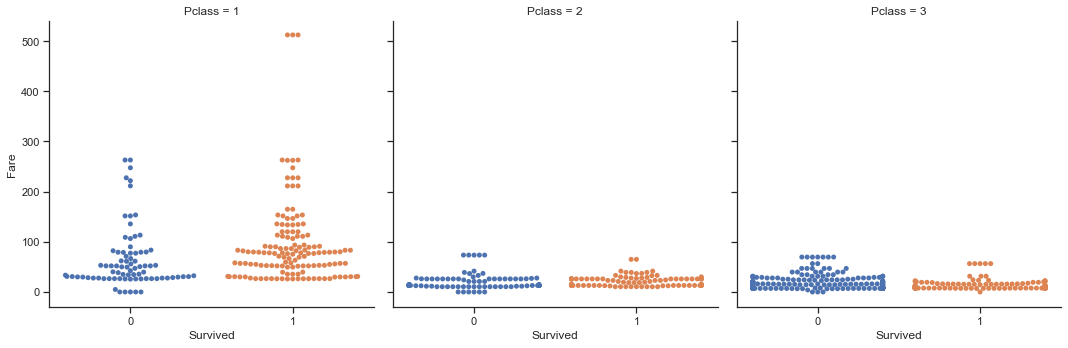

In [56]:
#Cat + Survived + Fare + Swarm + Pclass Column Plot
sns.catplot(x="Survived",y="Fare",data=data,kind="swarm",col="Pclass")
pass

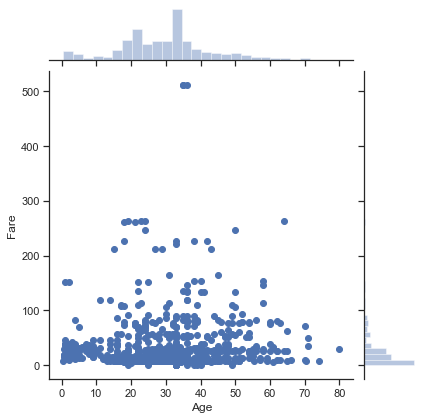

In [57]:
#Joint + Age + Fare Plot
sns.jointplot(x="Age",y="Fare",data=data)
pass

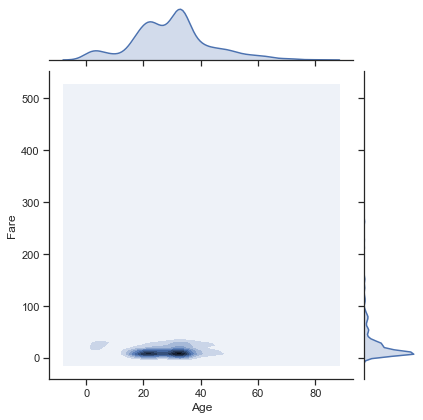

In [58]:
#Joint + Age + Fare + KDE Plot
sns.jointplot(x="Age",y="Fare",data=data,kind="kde")
pass

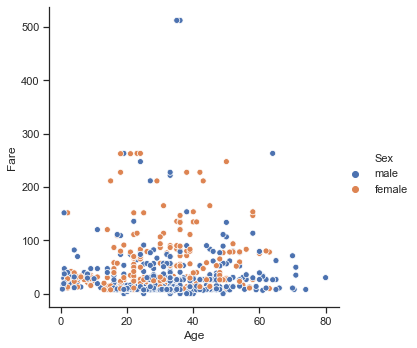

In [59]:
#Relational + Age + Fare + Sex Hue Plot
sns.relplot(x="Age",y="Fare",data=data,hue="Sex")
pass

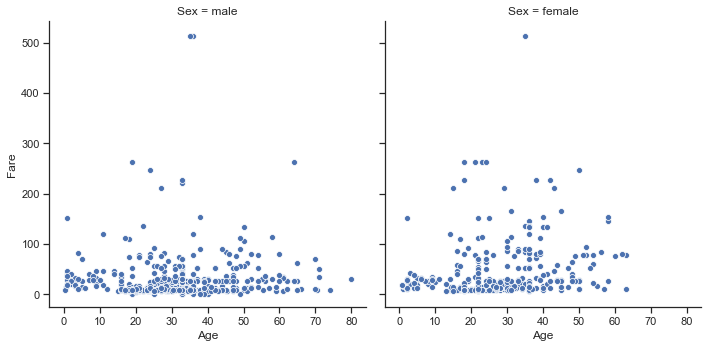

In [60]:
#Relational + Age + Fare + Sex Column Plot
sns.relplot(x="Age",y="Fare",data=data,col="Sex")
pass

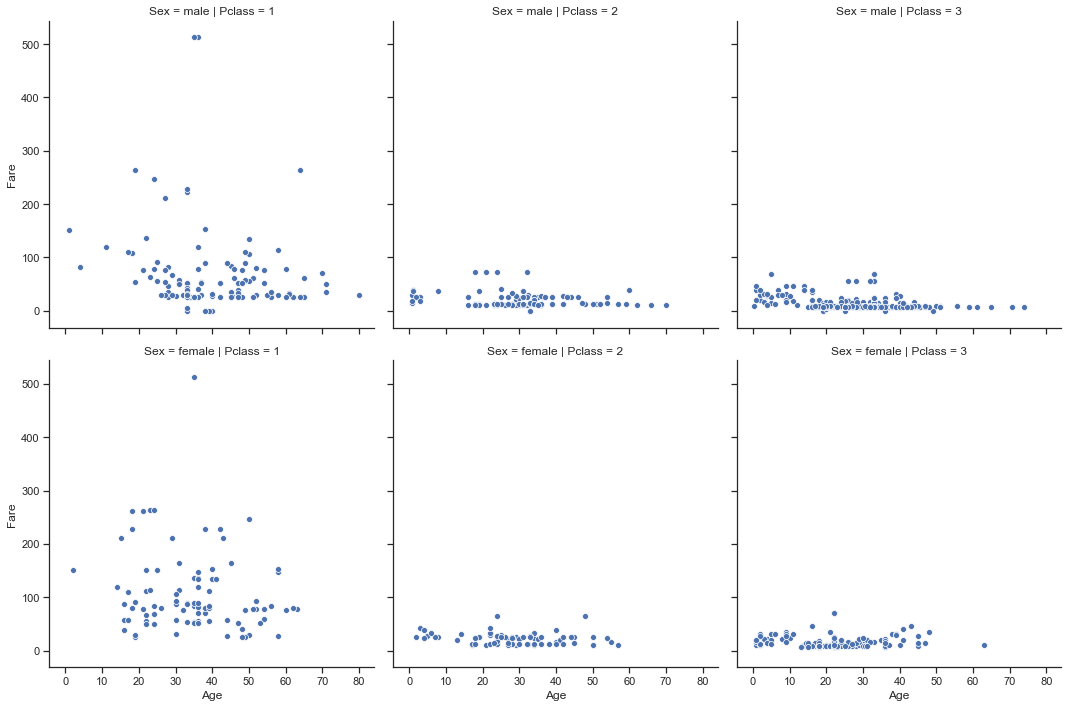

In [61]:
#Relational + Age + Fare + Sex Row + Pclass Column Plot
sns.relplot(x="Age",y="Fare",data=data,row="Sex",col="Pclass")
pass

In [62]:
data["Fare_Range"]=pd.qcut(data["Fare"],4)
data.groupby(["Fare_Range"])["Survived"].mean().to_frame().style.background_gradient(cmap="summer_r")

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [63]:
data["Fare_Group"]=0
data.loc[data["Fare"]<=7.91,"Fare_Group"]=0
data.loc[(data["Fare"]>7.91)&(data["Fare"]<=14.454),"Fare_Group"]=1
data.loc[(data["Fare"]>14.454)&(data["Fare"]<=31),"Fare_Group"]=2
data.loc[(data["Fare"]>31)&(data["Fare"]<=512.329),"Fare_Group"]=3

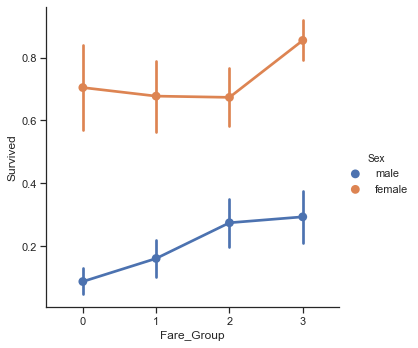

In [64]:
sns.factorplot("Fare_Group","Survived",data=data,hue="Sex")
pass

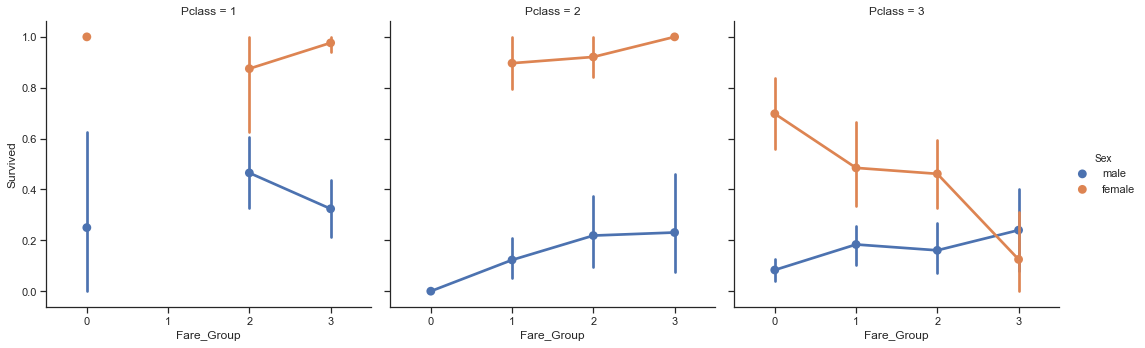

In [65]:
sns.factorplot("Fare_Group","Survived",data=data,col="Pclass",hue="Sex")
plt.show()

In [66]:
#Age
print("Oldest Passenger was:",data["Age"].max(),"Years")
print("Youngest Passenger was:",data["Age"].min(),"Years")
print("Average Age on the ship:",data["Age"].mean(),"Years")

Oldest Passenger was: 80.0 Years
Youngest Passenger was: 0.42 Years
Average Age on the ship: 29.841941638608304 Years


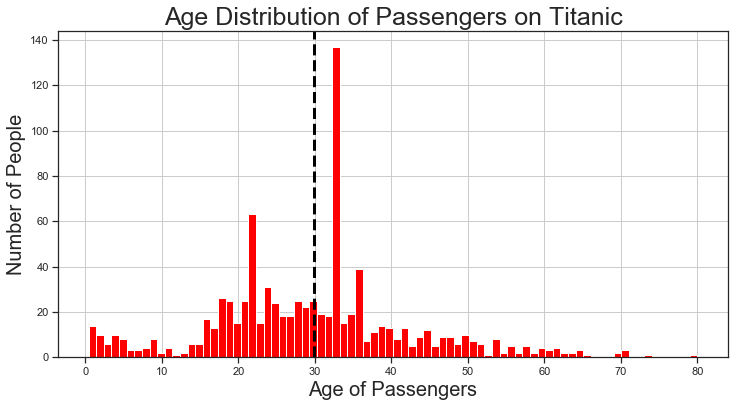

In [67]:
plt.figure(figsize=(12,6))
data[data["Age"]<200000].Age.hist(bins=80,color="red")
plt.axvline(data[data["Age"]<=100].Age.mean(),color="black",linestyle="dashed",linewidth=3)
plt.xlabel("Age of Passengers",fontsize=20)
plt.ylabel("Number of People",fontsize=20)
plt.title("Age Distribution of Passengers on Titanic",fontsize=25)
pass

In [68]:
print("Mean age of Passenger on Titanic:",int(data[data["Age"]<=100].Age.mean()),"Years")
print("Median age of Passenger on Titannic:",int(data[data["Age"]<=100].Age.median()),"Years")

Mean age of Passenger on Titanic: 29 Years
Median age of Passenger on Titannic: 30 Years


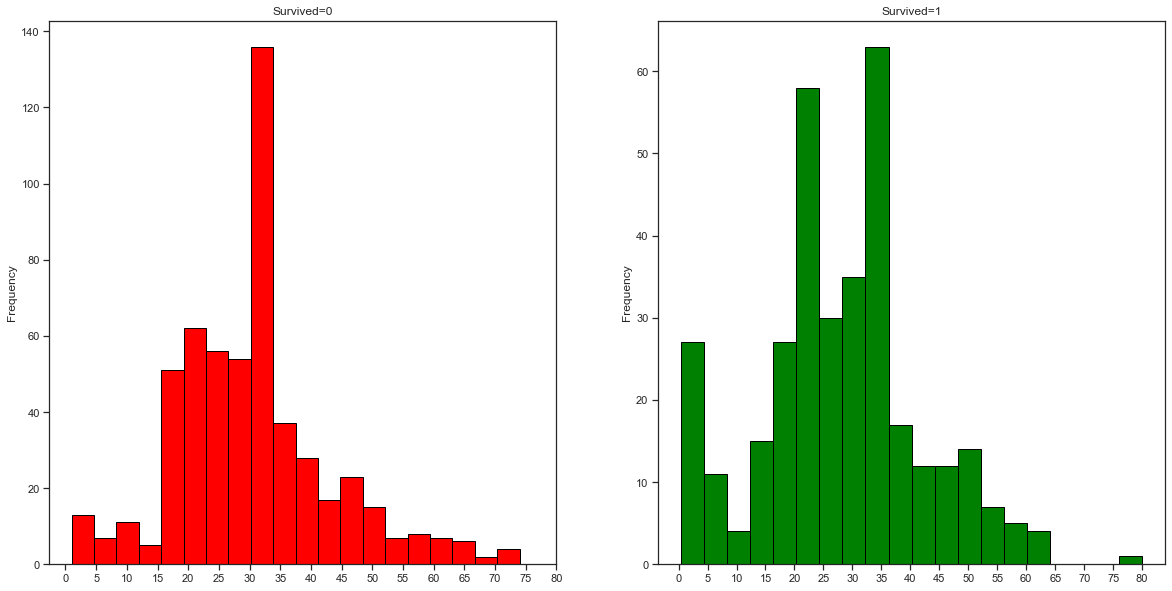

In [69]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data["Survived"]==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor="black",color="red")
ax[0].set_title("Survived=0")
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data["Survived"]==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor="black",color="green")
ax[1].set_title("Survived=1")
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

In [70]:
#Age Binning
data["Age_band"]=0
data.loc[data["Age"]<=16,"Age_band"]=0
data.loc[(data["Age"]>16)&(data["Age"]<=32),"Age_band"]=1
data.loc[(data["Age"]>32)&(data["Age"]<=48),"Age_band"]=2
data.loc[(data["Age"]>48)&(data["Age"]<=64),"Age_band"]=3
data.loc[data["Age"]>64,"Age_band"]=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_Range,Fare_Group,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,"(-0.001, 7.91]",0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,"(31.0, 512.329]",3,2


In [71]:
data["Age_band"].value_counts().to_frame().style.background_gradient(cmap="summer")

,Age_band
1,382
2,325
0,104
3,69
4,11


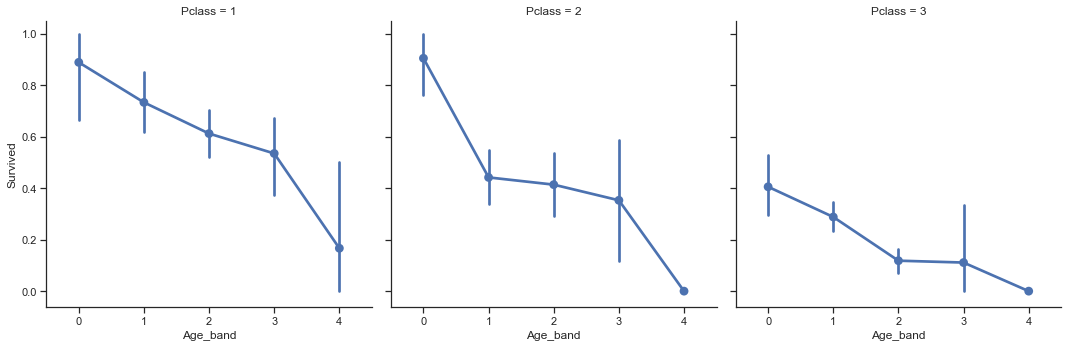

In [72]:
#Factor + Age Band + Survived + Pclass Plot
sns.factorplot("Age_band","Survived",data=data,col="Pclass")
plt.show()

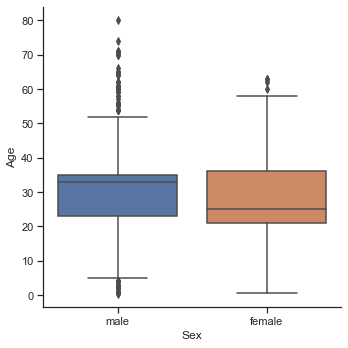

In [73]:
#Cat + Sex + Age + Box Plot
sns.catplot(x="Sex",y="Age",data=data,kind="box")
pass

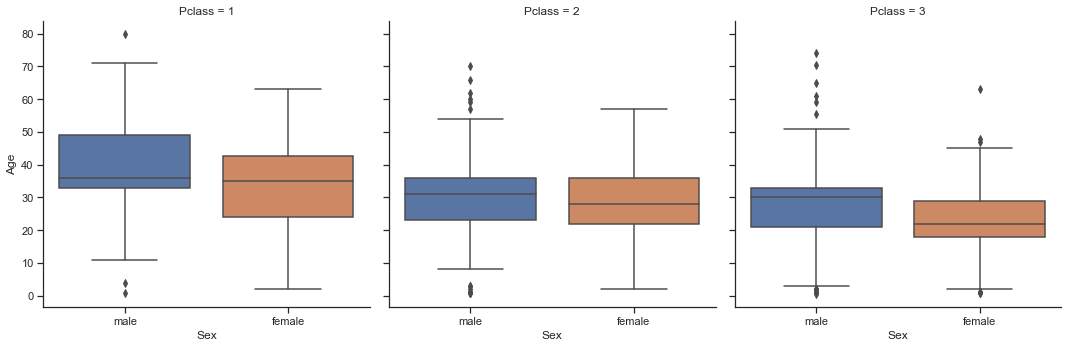

In [74]:
#Cat + Sex + Age + Box + Pclass Column Plot
sns.catplot(x="Sex",y="Age",data=data,kind="box",col="Pclass")
pass

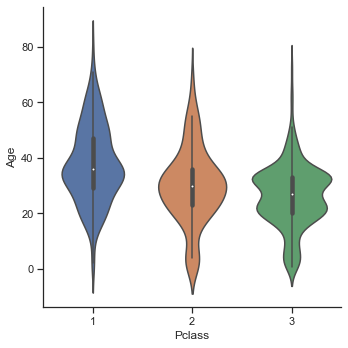

In [75]:
#Cat + Pclass + Age + Violin Plot
sns.catplot(x="Pclass",y="Age",data=data,kind="violin")
pass

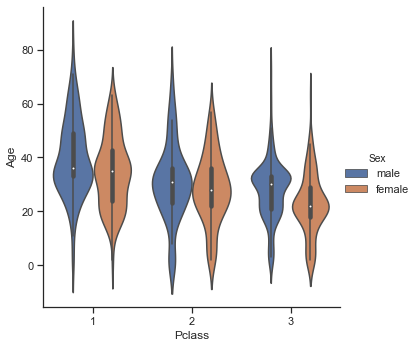

In [76]:
#Cat + Pclass + Age + Violin + Sex Hue Plot
sns.catplot(x="Pclass",y="Age",data=data,kind="violin",hue="Sex")
pass

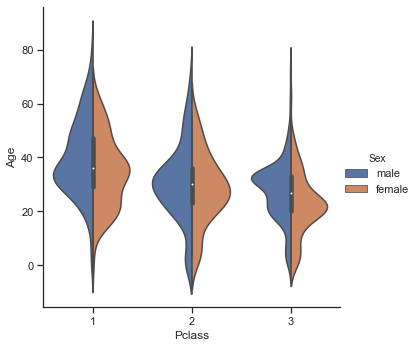

In [77]:
#Cat + Pclass + Age + Violin + Sex + Split Plot
sns.catplot(x="Pclass",y="Age",data=data,kind="violin",hue="Sex",split=True)
pass

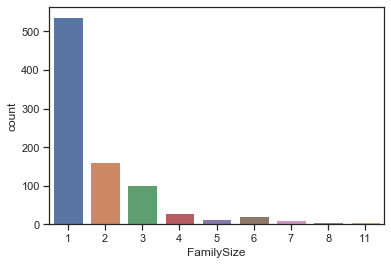

In [78]:
#Sibling and Spouse
data["FamilySize"]=data["SibSp"]+data["Parch"]+1
sns.countplot("FamilySize",data=data)
pass

In [79]:
#Bar and Factor plot SibSp Survived
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap="summer_r")

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


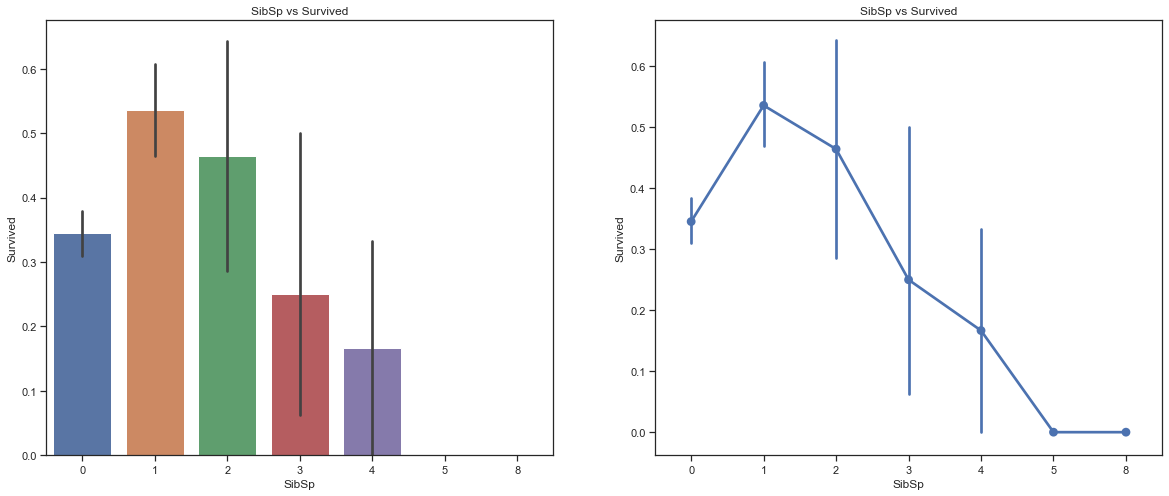

In [80]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot("SibSp","Survived",data=data,ax=ax[0])
ax[0].set_title("SibSp vs Survived")
sns.factorplot("SibSp","Survived",data=data,ax=ax[1])
ax[1].set_title("SibSp vs Survived")
plt.close(2)
plt.show()

In [81]:
#Parents and Children(Parch)
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap="summer_r")

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


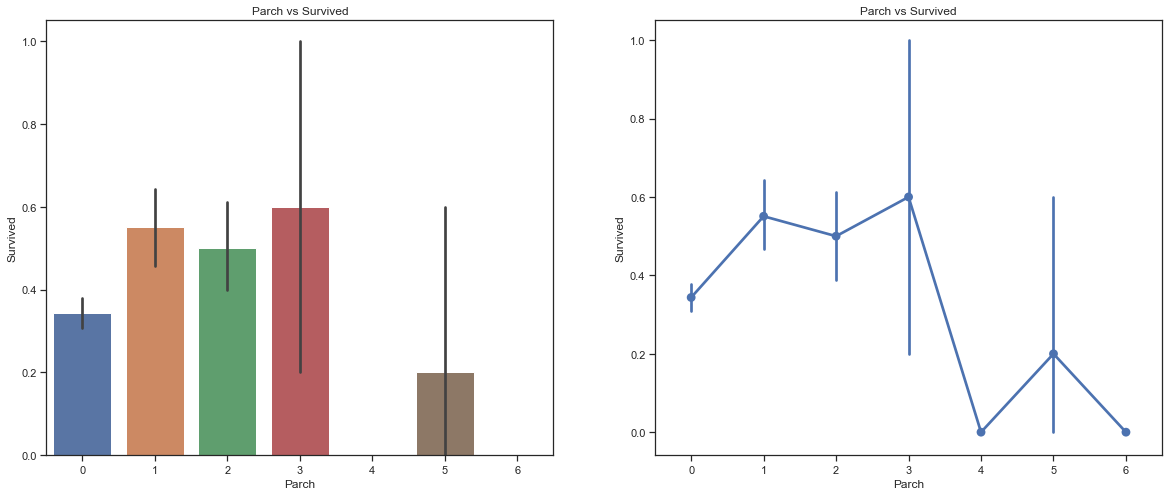

In [82]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot("Parch","Survived",data=data,ax=ax[0])
ax[0].set_title("Parch vs Survived")
sns.factorplot("Parch","Survived",data=data,ax=ax[1])
ax[1].set_title("Parch vs Survived")
plt.close(2)
plt.show()

In [83]:
#Embarked
#Value Counts
data["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

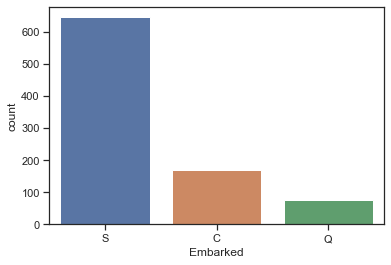

In [84]:
#Count Plot
sns.countplot("Embarked",data=data)
pass

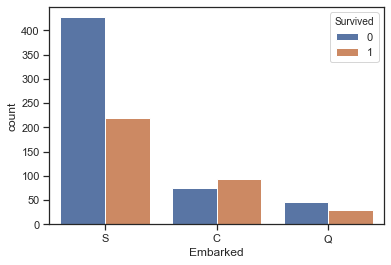

In [85]:
#Absolute Value of Survived
sns.countplot("Embarked",data=data,hue="Survived")
pass

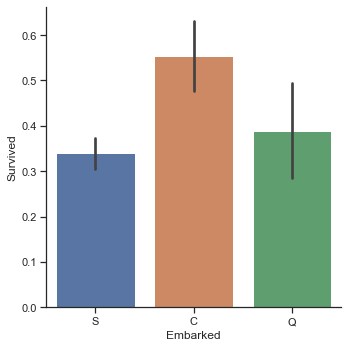

In [87]:
sns.catplot(x="Embarked",y="Survived",data=data,kind="bar");

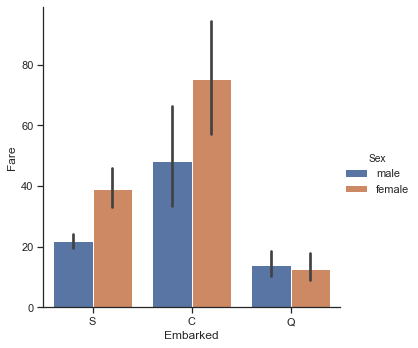

In [88]:
#Cat + Embarked + Fare + Bar + Sex Plot
sns.catplot(x="Embarked",y="Fare",data=data,kind="bar",hue="Sex")
pass

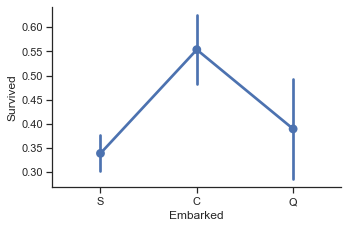

In [90]:
#Percentage Survived by Port
sns.factorplot("Embarked","Survived",data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

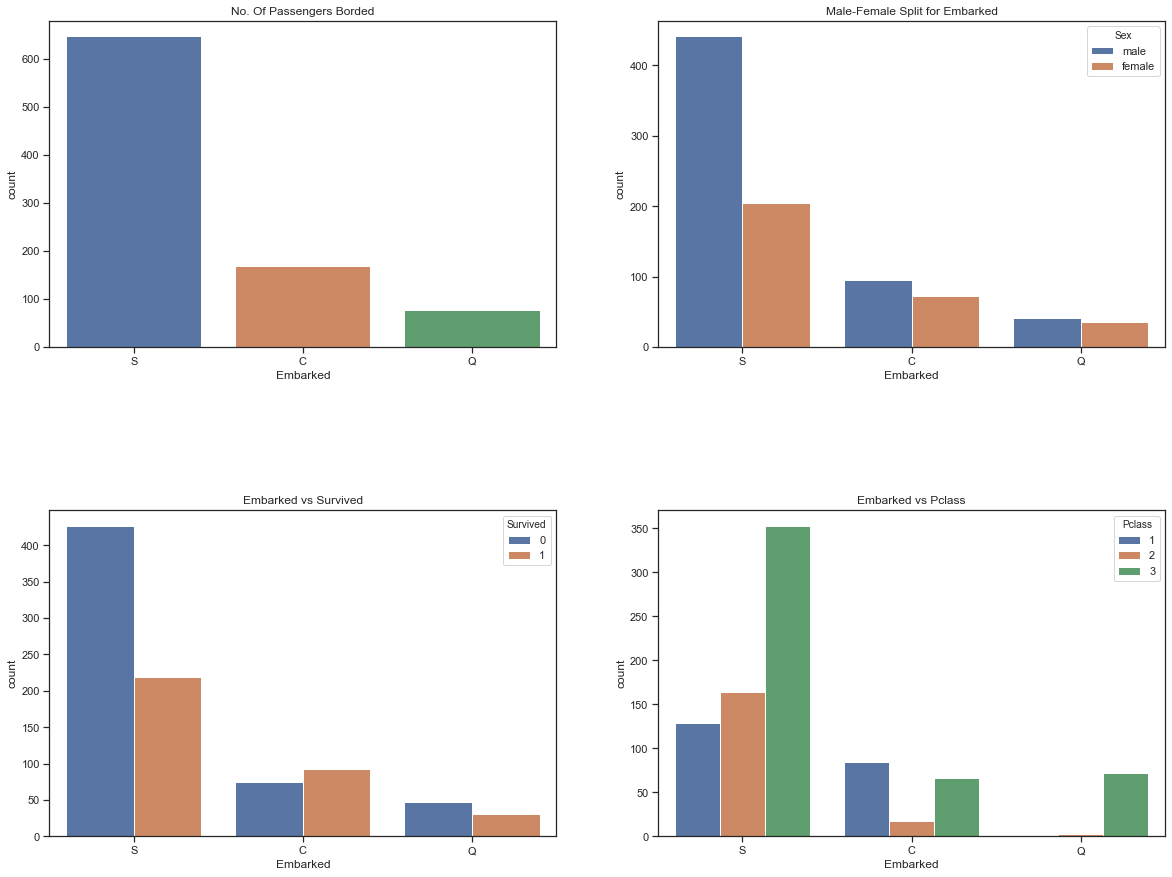

In [91]:
#Count Plot Based On Embarked, Sex and Class
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot("Embarked",data=data,ax=ax[0,0])
ax[0,0].set_title("No. Of Passengers Borded")
sns.countplot("Embarked",data=data,hue="Sex",ax=ax[0,1])
ax[0,1].set_title("Male-Female Split for Embarked")
sns.countplot("Embarked",data=data,hue="Survived",ax=ax[1,0])
ax[1,0].set_title("Embarked vs Survived")
sns.countplot("Embarked",data=data,hue="Pclass",ax=ax[1,1])
ax[1,1].set_title("Embarked vs Pclass")
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

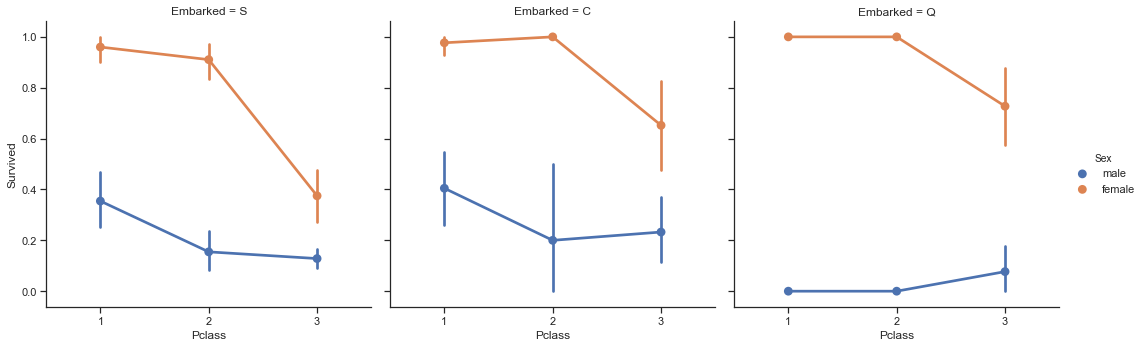

In [92]:
#Factor Plot based on Class, Survival, Sex and Embarked
sns.factorplot("Pclass","Survived",hue="Sex",col="Embarked",data=data)
plt.show()

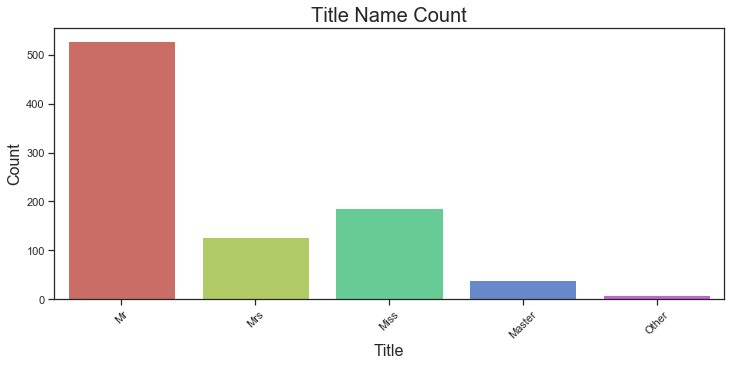

In [93]:
#Who
import re
plt.figure(figsize=(12,5))
sns.countplot(x="Title",data=data,palette="hls")
plt.xlabel("Title",fontsize=16)
plt.ylabel("Count",fontsize=16)
plt.title("Title Name Count",fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [94]:
Title_Dictionary={
    "Capt":"Officier",
    "Col":"Officier",
    "Major":"Officier",
    "Dr":"Officier",
    "Rev":"Officier",
    "Jonkheer":"Royalty",
    "Don":"Royalty",
    "Sir":"Royalty",
    "the Countess":"Royalty",
    "Dona":"Royalty",
    "Lady":"Royalty",
    "Mme":"Mrs",
    "Ms":"Mrs",
    "Mrs":"Mrs",
    "Mlle":"Miss",
    "Miss":"Miss",
    "Mr":"Miss",
    "Master":"Master"
}
data["Title"]=data.Title.map(Title_Dictionary)

Chance of Survival based on Titles:
Title
Master    0.575000
Miss      0.303497
Mrs       0.795276
Name: Survived, dtype: float64


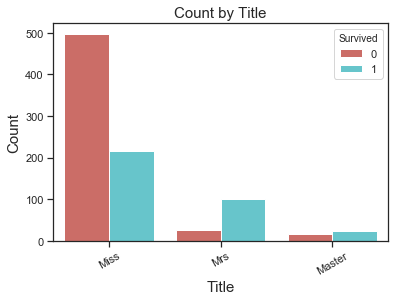

In [95]:
print("Chance of Survival based on Titles:")
print(data.groupby("Title")["Survived"].mean())
sns.countplot(x="Title",data=data,palette="hls",hue="Survived")
plt.xlabel("Title",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Count by Title",fontsize=15)
plt.xticks(rotation=30)
plt.show()

In [96]:
#Feature Engineering
#Converting String to Numerical Values
data["Sex"]=data["Sex"].astype(str)
data["Embarked"]=data["Embarked"].astype(str)
data["Sex"].replace(["male","female"],[0,1],inplace=True)
data["Embarked"].replace(["S","C","Q"],[0,1,2],inplace=True)
data["Title"].replace(["Mr","Mrs","Miss","Master","Other"],[0,1,2,3,4],inplace=True)
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_Range,Fare_Group,Age_band,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,2,"(-0.001, 7.91]",0,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,"(31.0, 512.329]",3,2,2


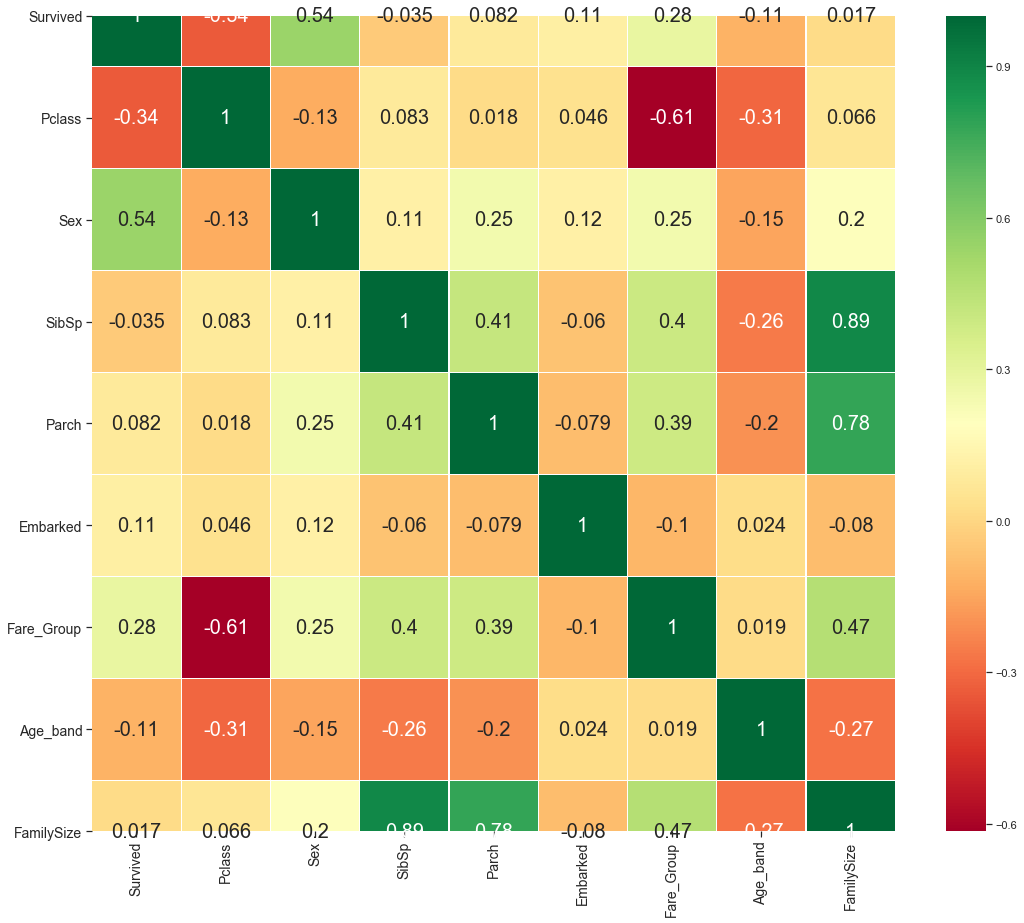

In [97]:
df=data.copy()
df.drop(["Name","Age","Ticket","Fare","Cabin","Fare_Range","PassengerId"],axis=1,inplace=True)
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn",linewidth=0.2,annot_kws={'size':20})
ws={'size':20}
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [98]:
df.drop(["SibSp","Parch"],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Embarked,Title,Fare_Group,Age_band,FamilySize
0,0,3,0,0,2,0,1,2
1,1,1,1,1,1,3,2,2
2,1,3,1,0,2,1,1,1
3,1,1,1,0,1,3,2,2
4,0,3,0,0,2,1,2,1


In [99]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Embarked      0
Title         9
Fare_Group    0
Age_band      0
FamilySize    0
dtype: int64

In [100]:
df=df.dropna()

<Figure size 864x432 with 0 Axes>

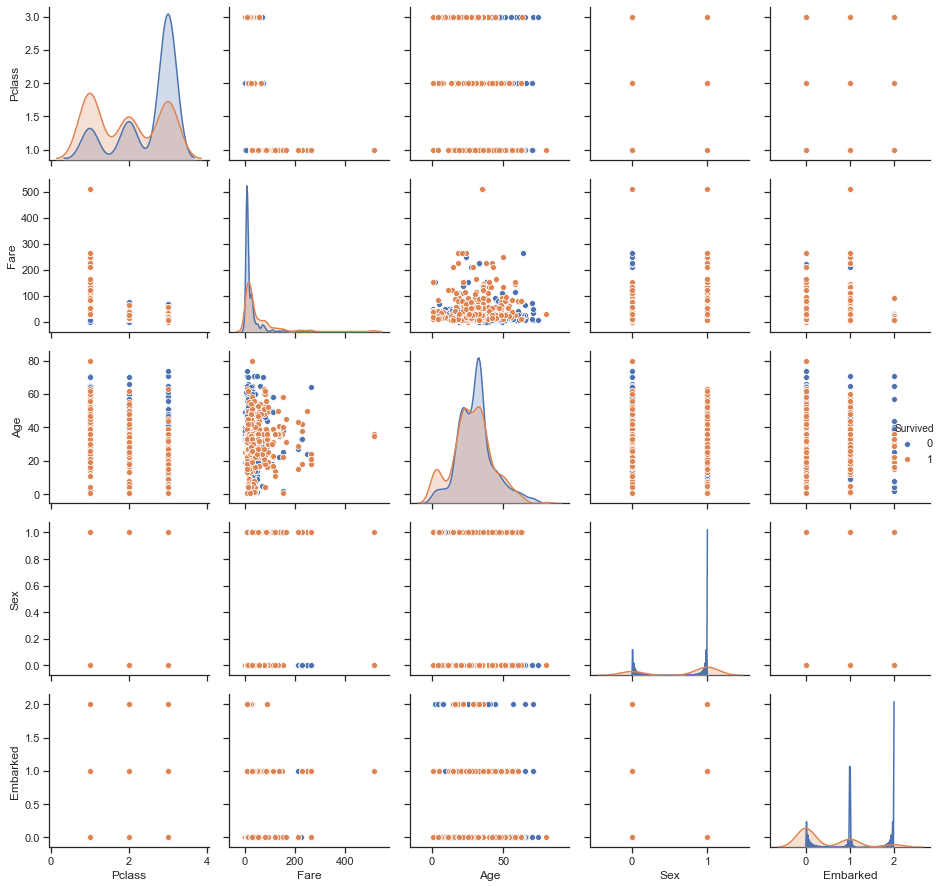

In [102]:
plt.figure(figsize=(12,6))
sns.pairplot(data,vars=['Pclass','Fare','Age','Sex','Embarked'],hue='Survived')
plt.tight_layout()
plt.ioff()
pass

In [103]:
#Model Build
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [105]:
#Creating Matrix of Features
X=df.drop(labels="Survived",axis=1)
y=df["Survived"]

In [106]:
#Test Train Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=1234,stratify=y)

print("Training Set:",len(X_train))
print("Test Set:",len(X_test))
print("Training Labels:",len(y_train))
print("Test Labels:",len(y_test))

Training Set: 793
Test Set: 89
Training Labels: 793
Test Labels: 89


In [107]:
#Linear Support Vector Machine(Linear-SVM)
model=svm.SVC(kernel="linear",C=0.1,gamma=0.1)
model.fit(X_train,y_train)
prediction1=model.predict(X_test)
print("Accuracy for linear SVM is",metrics.accuracy_score(prediction1,y_test))

Accuracy for linear SVM is 0.8314606741573034


In [109]:
#Radial SVM(rdf-SVM)
model=svm.SVC(kernel="rbf",C=1,gamma=0.1)
model.fit(X_train,y_train)
prediction2=model.predict(X_test)
print("Acuuracy for rbf SVM is",metrics.accuracy_score(prediction2,y_test))

Acuuracy for rbf SVM is 0.8426966292134831


In [110]:
#Decision Tree
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
prediction3=model.predict(X_test)
print("The accuracy of the Decision Tree is",metrics.accuracy_score(prediction3,y_test))

The accuracy of the Decision Tree is 0.8426966292134831


In [111]:
#Random Forest
model=RandomForestClassifier()
model.fit(X_train,y_train)
prediction4=model.predict(X_test)
print("The accuracy of the Random Forests is",metrics.accuracy_score(prediction4,y_test))

The accuracy of the Random Forests is 0.8089887640449438


In [112]:
#Gaussian Naive Bayes
model=GaussianNB()
model.fit(X_train,y_train)
prediction5=model.predict(X_test)
print("The accuracy of the Naive Bayes is",metrics.accuracy_score(prediction5,y_test))

The accuracy of the Naive Bayes is 0.7528089887640449


In [113]:
#Logistic Regression
model=LogisticRegression()
model.fit(X_train,y_train)
prediction6=model.predict(X_test)
print("The accuracy of the Logistic Regression is",metrics.accuracy_score(prediction6,y_test))

The accuracy of the Logistic Regression is 0.7640449438202247


In [114]:
#K Nearest Neighbors(KNN)
model=KNeighborsClassifier()
model.fit(X_train,y_train)
prediction7=model.predict(X_test)
print("The accuracy of the KNN is",metrics.accuracy_score(prediction7,y_test))

The accuracy of the KNN is 0.7528089887640449


In [117]:
#K Fole Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
kfold=KFold(n_splits=10,random_state=22)
xyz=[]
accuracy=[]
std=[]
classifiers=["Linear SVM","Radial SVM","Decision Tree","Random Forest","Naive Bayes","Logistic Regression","KNN"]
models=[svm.SVC(kernel="linear"),svm.SVC(kernel="rbf"),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=100),GaussianNB(),LogisticRegression(),KNeighborsClassifier(n_neighbors=9)]
for i in models:
    model=i
    cv_result=cross_val_score(model,X,y,cv=kfold,scoring="accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear SVM,0.785649,0.036774
Radial SVM,0.833299,0.037099
Decision Tree,0.816318,0.031248
Random Forest,0.812921,0.041016
Naive Bayes,0.809627,0.038292
Logistic Regression,0.789109,0.021643
KNN,0.800485,0.037442


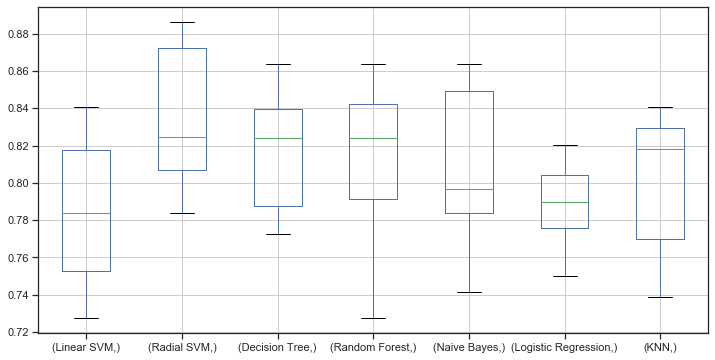

In [119]:
#Box Plot Model Accuracy
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()
pass